Thompson Sampling

Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

Import the Data set

In [19]:
df=pd.read_csv("Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Implementing Thompson Sampling

In [20]:
N=10000
d=10
ads_selected=[]
no_of_reward_1=[0]*d #alpha
no_of_reward_0=[0]*d #beta
Total_reward=0
for n in range(N):
    ad=0
    max_random=0
    for i in range (d):
        random_beta=random.betavariate(no_of_reward_1[i]+1,no_of_reward_0[i]+1)
        # max_random=max(max_random,random_beta)
        if (max_random<random_beta):
            max_random=random_beta
            ad=i
    ads_selected.append(ad)
    reward=df.values[n,ad]
    if(reward==1):
        no_of_reward_1[ad]+=1
    else:
        no_of_reward_0[ad]+=1
    Total_reward+=reward
# print(ads_selected)
# print(Total_reward)
    

Visulation of The Results

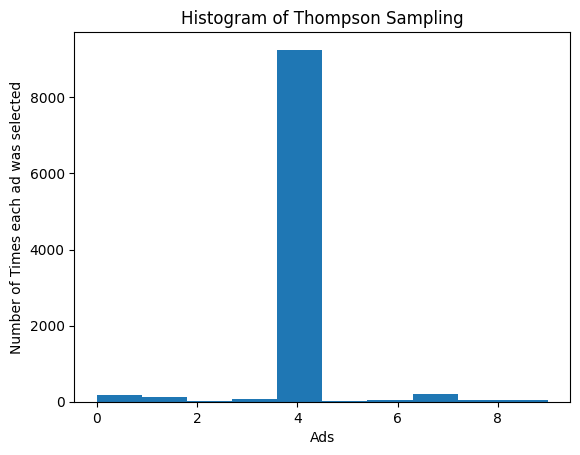

In [21]:
plt.hist(ads_selected)
plt.title("Histogram of Thompson Sampling")
plt.xlabel("Ads")
plt.ylabel("Number of Times each ad was selected")
plt.savefig("Thompson Sampling Histogram.png")
plt.show()